In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

In [2]:
clean = pd.read_csv('clean_kaggle_data.csv')     
clean.head()           # show the first several rows(default=5) of the clean data

/var/folders/43/nrds9n3n523d8m2b4m6bh0480000gn/T/ipykernel_34425/2164211453.py:1: DtypeWarning: Columns (285) have mixed types. Specify dtype option on import or set low_memory=False.
  clean = pd.read_csv('clean_kaggle_data.csv')


,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
2,3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Creat a new dataframe containing Country, Age,Gender, Education, Professional Experience, and Salary as the main 
# interest features, and the column names should be changed to the feature names, instead of question numbers.

imp = clean.rename(columns ={'Q1':'Age', 'Q2':'Gender', 'Q3':'Country', 'Q4':'Education', 'Q5':'Job', 'Q6':'Experience','Q25':'Salary'})
imp = imp[['Age', 'Gender','Country','Education','Job', 'Experience', 'Salary']]
imp

,Age,Gender,Country,Education,Job,Experience,Salary
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,30000
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,70000
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,1000
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,40000
4,45-49,Man,India,Doctoral degree,Other,< 1 years,40000
...,...,...,...,...,...,...,...
15386,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,4000
15387,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,90000
15388,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,20000
15389,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,1000


#### As we wanna figure out the nature of women's representation in jobs, first we observe the number of each Job the participants are taking, by gender.

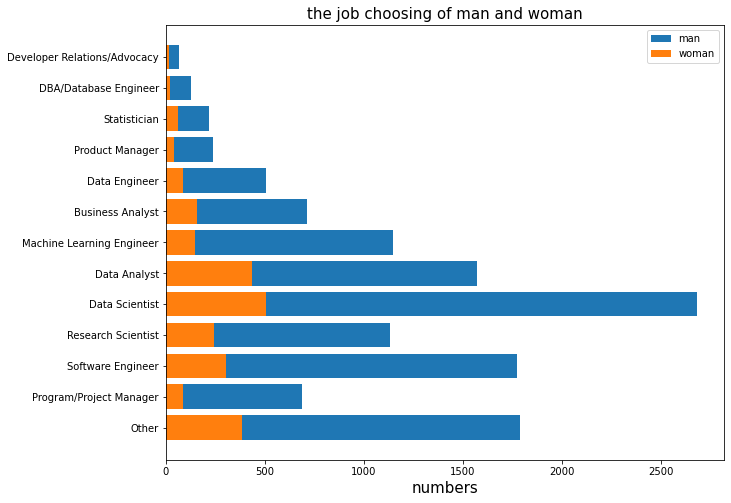

In [4]:
jobs=imp.Job.unique()   #get a series containing all the jobs
#creat a series with job names as indexes, and the total numbers as values, for both man and women
man_job = imp[imp.Gender=='Man'].Job.value_counts().reindex(index = jobs)        
woman_job = imp[imp.Gender=='Woman'].Job.value_counts().reindex(index = jobs)

fig = plt.figure(figsize=(10,8))
plt.barh(jobs,man_job.values,label='man')
plt.barh(jobs,woman_job.values,label='woman')     #get a horizontal bar plot of the numbers of jobs by gender
plt.xlabel("numbers",fontsize = 15)
plt.title("the job choosing of man and woman",fontsize = 15)
plt.legend()
plt.show()

The spread of women and men on choosing each job seemed similar, as the Data Scientists was the primary group, and Developer Relations/Advocacy took the least amount. However, the proportions of male employees on each job position was performed overwhelmingly at the same time, and only an approximate of 25% or less were taken by women in each position.


#### See how the highest education level would affect the salary by comparing their means and medians.



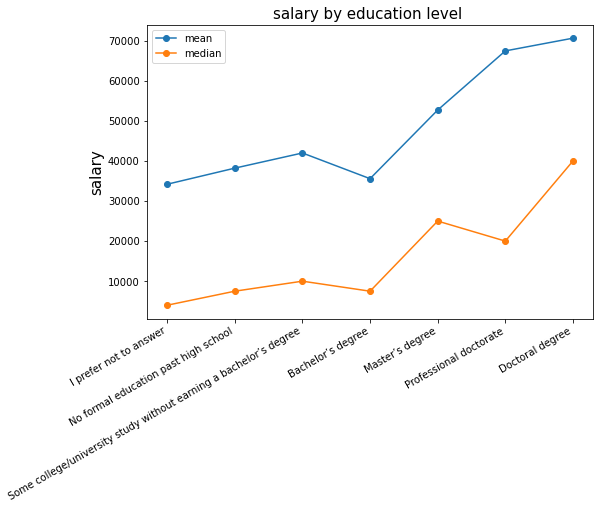

In [5]:
#check the levels of eductaion, and convert the them in an ascending order(but put no answer as the first one)
imp.Education.unique()  
edu_list = ['I prefer not to answer','No formal education past high school',
                     'Some college/university study without earning a bachelor’s degree',
                    'Bachelor’s degree','Master’s degree','Professional doctorate','Doctoral degree']
#get the mean and median values of salary with respect to ascending education levels.
edu_mean = imp.groupby('Education').Salary.mean().reindex(index = edu_list)    
edu_median = imp.groupby('Education').Salary.median().reindex(index = edu_list)   

#plot the trend lines of the mean and median
fig = plt.figure(figsize=(8,6))
plt.plot(edu_list, edu_mean, '-o',label='mean')
plt.plot(edu_list, edu_median, '-o',label='median')
plt.ylabel("salary",fontsize = 15)
plt.title("salary by education level ",fontsize = 15)
plt.legend()
fig.autofmt_xdate()    #change the angle of the level names in x-axis for a better view
plt.show()

The median and mean salary regarding the education levels, from lower to higher, were displayed similarly, in spite of  that the mean salary of the participants with the same eduction levels kept much higher than the median, and  the group with profession doctorate got lower median salary than the ones with Master’s degree. Apart from that, the group with Bachelor’s degree had a lower median and mean salary comparing with the group took some college/university study without earning a Bachelor’s degree.

#### Getting to know the data better :

 * Observation 1. 
 
 See as the experience increases, how the top choice on job would change.

In [6]:
exp = imp.groupby('Experience').Job.describe()  # get a df with the basic descriptions for each experience level,
exp_list = ['I have never written code','< 1 years','1-3 years','3-5 years','5-10 years','10-20 years', '20+ years']
exp = exp.reindex(exp_list)   # change the order of the index to (low-high)
exp

,count,unique,top,freq
Experience,,,,
I have never written code,961,13,Other,319
< 1 years,2463,13,Data Analyst,517
1-3 years,3691,13,Data Scientist,866
3-5 years,2461,13,Data Scientist,623
5-10 years,2345,13,Data Scientist,595
10-20 years,1846,13,Data Scientist,401
20+ years,1624,13,Software Engineer,336


Observed the most popular job is DataAnalyst as its the top job(in amount) for the participants from a newbie to 
with 20-year experience.

* Observation 2. 

See how the salary would change with respect to experiece

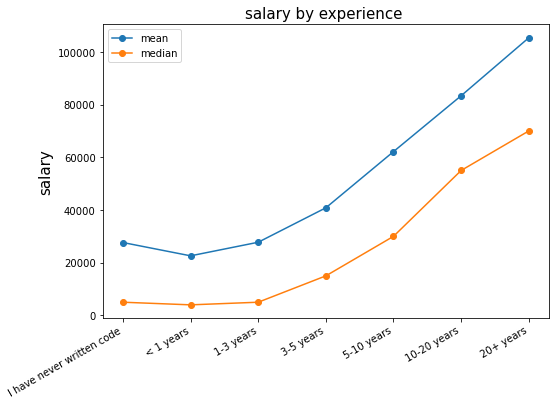

In [7]:
# plot the Salary v.s. Experience

# get dfs with experieces as index,and mean(median) salary as values.
exp_mean = imp.groupby('Experience').Salary.mean().reindex(index = exp_list)
exp_median = imp.groupby('Experience').Salary.median().reindex(index = exp_list)

#plot the trend lines of mean and median in one plot
fig = plt.figure(figsize=(8,6))
plt.plot(exp_list, exp_mean, '-o',label='mean')
plt.plot(exp_list, exp_median, '-o',label='median')
plt.ylabel("salary",fontsize = 15)
plt.title("salary by experience ",fontsize = 15)
plt.legend()
fig.autofmt_xdate()    #change the angle of the level names in x-axis for a better view
plt.show()

The group with no experience on coding and mostly works on other jobs have slightly higher salary than the newbies. Apart from that, the salary would increase as your experience was improved by the upward trends.




* Observation 3

As the age and experiece are always related with each other sometimes, let's see how the salary would change 
with respect to age.



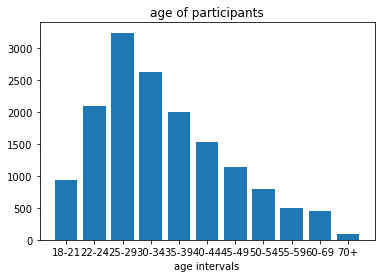

In [8]:
#first, figure the distrubution of the age of the participants.
age_info = imp.Age.value_counts().sort_index()     # get df with age as index, total amount of each age as the value.
plt.bar(age_info.index,age_info.values)      #get the bar chart 
plt.title('age of participants')
plt.xlabel('age intervals')
plt.show()

Notice the most of the participants are from 22-39 years old, with 25-29 as the dominant group, and the numbers 
began to decline after that.



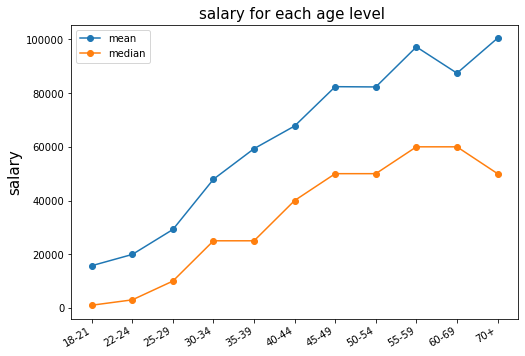

In [9]:
# Then, see salary for different levels of age

imp.Age.unique()   #check the levels of eductaion
Age_mean = imp.groupby('Age').Salary.mean()         
Age_median = imp.groupby('Age').Salary.median()   #get dfs with age as index, each mean/median salary as the value

#plot
fig = plt.figure(figsize = (8,6))   
Age_x = Age_mean.index       #set the age intervals on x_axis in advance for simplicity later
plt.plot(Age_x, Age_mean,'-o',label='mean')
plt.plot(Age_x, Age_median, '-o',label='median')
plt.title("salary for each age level ",fontsize = 15)
plt.ylabel("salary",fontsize = 15)
plt.legend()
fig.autofmt_xdate()
plt.show()


Notice the mean salary is higer than the median salary in each age interval, which means the small group with
higher salary leads the avarage income to increase. The mean and median salary of the groups with 60-year or higher old might not follow the tendency, which meant the salary of the one around retirement age were not much predictable.



# Q2.a

Compute decriptive statistics of salary for men and women.

In [10]:
imp.Salary.isna().sum()     #check na ==> sum=0,no missing values of salary
temp = imp.groupby('Gender').Salary.describe()    # get the despription of all the genders
gender_salary = temp.loc[['Man','Woman'],:]    #extract Man and Woman
gender_salary

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Man,12642.0,51193.600696,99979.274378,1000.0,2000.0,20000.0,60000.0,1000000.0
Woman,2482.0,34816.881547,72017.347888,1000.0,1000.0,7500.0,50000.0,1000000.0


The table showed a clear gap between the amount of participants and the salary by men and women, except the same extreme values. 

# Q2.b 

Perform Two-sample t-test with a 0.05 threshold.

In [11]:
# To test the average salary of men vs. women, assume there is difference between the two groups.
#H0 = no difference between the mean salary of men & women
#H1 = the difference between mean salary of men & women existed

man_salary=imp[imp.Gender == 'Man'].Salary            
woman_salary = imp[imp.Gender == 'Woman'].Salary    #get men's/women's salaries in a series repectively

ts, ps = stats.ttest_ind(man_salary, woman_salary)       #perform t-test
print ("t-test: t = %g  p = %g" % (ts, ps))

# p value<< significant level of 0.05, so we reject the null hypothesis and conclude that the difference between 
# the mean salarys of men & women did exist.

t-test: t = 7.77406  p = 8.08881e-15


As the p-value was 8.08881e-15 which was less than the threshold, the higher mean average salary for male employees observed before was most likely not due to change, reject the null hypothesis,and the difference was statistically significant. 


# Q2.c  

Bootstrap data for comparing the mean of salary (Q25) for the men and women.



In [12]:
bs_woman = [] 
bs_man = []
bs_diff = []    #get three temporary empty lists for bootstrapped mean salary of women and men, the difference

np.random.seed(0)       #make result reproducible

for i in range(1000):    # create a loop to bootstrap 1000 times
    # for men and women, add the mean value of the bootstrapped salary into its list created above repspectively 
    # each time
    
    man_mean = np.random.choice(man_salary,len(man_salary)).mean()
    bs_man.append(man_mean)
    woman_mean = np.random.choice(woman_salary,len(woman_salary)).mean()
    bs_woman.append(woman_mean)

    # add the difference of the mean value to the difference list each time
    bs_diff.append(man_mean - woman_mean)


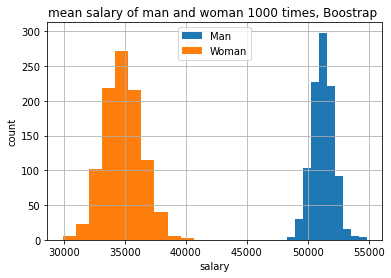

In [13]:
# present the distributions of 1000 bootstrapped mean salaries by gender in a graph
plt.hist(bs_man,label ='Man')
plt.hist(bs_woman,label = 'Woman')
plt.xlabel("salary")
plt.ylabel('count')
plt.title('mean salary of man and woman 1000 times, Boostrap ')
plt.legend(loc='upper center')
plt.grid()
plt.show()

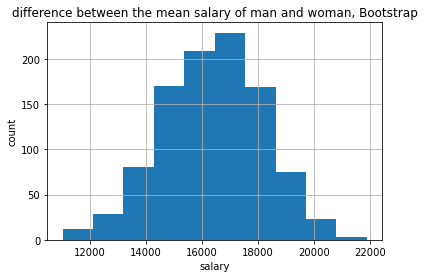

In [14]:
# present the distributions of 1000 bootstrapped differneces of mean salary by gender
plt.hist(bs_diff)
plt.xlabel('salary')
plt.ylabel('count')
plt.title('difference between the mean salary of man and woman, Bootstrap')
plt.grid()
plt.show()

All the 3 distribution were roughly normal, and suggested the mean pay in jobs related with coding was approximately $14,000 to $18,000 higher for men than women in most cases.

# Q2.d

Two-sample t-test with a 0.05 threshold on the bootstrapped data.


In [15]:
boot_ts, boot_ps = stats.ttest_ind(bs_man, bs_woman)   
print ("t-test: t = %g  p = %g" % (boot_ts, boot_ps))

t-test: t = 293.153  p = 0


p=0<0.05, reject the null hyupothesis, the difference was statistically significant.

# Q2.e 


The commments were made below each step. The final conlsuion:
we concluded that the mean salary of men tended to be higher than that of women obviously in the jobs related with coding, with a approxiamte $14,000 to $18,000 difference in most cases.







# Q3.a

Compute decriptive statistics of salary for the participants with Bachelor’s degree, Master’s degree,or Doctoral degree.

In [16]:
imp.Education.isna().sum()      #check na ==> sum = 0, no missing values of salary
temp = imp.groupby('Education').Salary.describe()   #get the desprition of salary by education
education_salary = temp.loc[['Bachelor’s degree','Master’s degree','Doctoral degree'],:]
education_salary     #extract the data of three levels we want

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor’s degree,4777.0,35578.291815,89382.060777,1000.0,1000.0,7500.0,40000.0,1000000.0
Master’s degree,6799.0,52706.868657,90928.786678,1000.0,3000.0,25000.0,70000.0,1000000.0
Doctoral degree,2217.0,70641.181777,117160.947589,1000.0,4000.0,40000.0,90000.0,1000000.0


most employees were with Master’s degree and then Bachelors’ degree, and the salaries at the mean and all the percentiles would increase from Bachelor’s to Doctoral degree.

# Q3.b 

Perform ANOVA.

In [17]:
from scipy.stats import f_oneway
#Assume differences of the salary for different eductaion level exist
# H0= No difference between the means of the salary for different eductaion level. mean1=mean2=mean3
# H1= Differences exist. (mean i != mean) for some i in these levels of education

# get three series containing the salaries for each education level
bach_salary = imp[imp.Education=='Bachelor’s degree'].Salary
master_salary = imp[imp.Education=='Master’s degree'].Salary
doc_salary = imp[imp.Education=='Doctoral degree'].Salary  

# perform the ANOVA of the 3 dataset
F,p = f_oneway(bach_salary, master_salary, doc_salary)
print ("ANOVA: F = %g  p = %g" % (F, p))

ANOVA: F = 109.758  p = 5.1077e-48


p<<0.05, reject the null hypothesis. The mean salary for the people with different higest levels of education 
differed, mean salary would rise with improved qualifications in education.

# Q3.c 

Bootstrap data for comparing the mean of salary (Q25) for three education levels above.



In [18]:
bs_bach = []
bs_master = []
bs_doc = []    # before bootstrap, create 3 temporary empty lists for the education levels

diff_doc_master =[]
diff_doc_bach =[]
diff_master_bach=[]  #creat the temporary empty lists for the differences, there are 3 levels, so 3C2=3 combinations

np.random.seed(1)   #make sure the result is reproducible
for i in range(1000):     #loop for bootstrapping 1000 times
    
    # for the three education levels, add the mean value of the bootstrapped salary into its list created above 
    # repspectively each time
    bach = np.random.choice(bach_salary,len(bach_salary)).mean()
    bs_bach.append(bach)
    
    master = np.random.choice(master_salary,len(master_salary)).mean()
    bs_master.append(master)
    
    doc = np.random.choice(doc_salary,len(doc_salary)).mean()
    bs_doc.append(doc) 
    
    # get the difference of the two mean value (3 combinations) and appened it to its list each time
    diff_doc_master.append(doc - master)
    diff_doc_bach.append(doc - bach)
    diff_master_bach.append(master-bach)  

By taking a random sample with replacement from the data used for both men and women, with sample size as the original 12642 and 2482 respectively, the bootstrap was introduced and repeated 1000 times.

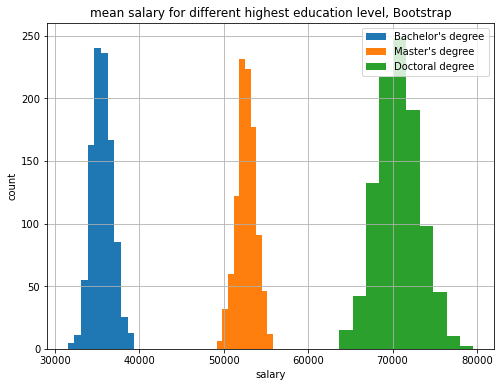

In [19]:
# get the three distribution of the mean salaries of the bootstrapped data by eductaion levels
fig = plt.figure(figsize = (8,6))
plt.hist(bs_bach,label ="Bachelor's degree")
plt.hist(bs_master,label = "Master's degree")
plt.hist(bs_doc,label ="Doctoral degree" )
plt.xlabel("salary")
plt.ylabel('count')
plt.title('mean salary for different highest education level, Bootstrap')
plt.legend()
plt.grid()
plt.show()

Text(0.5, 1.0, "Master's & Bachelor's Degree")

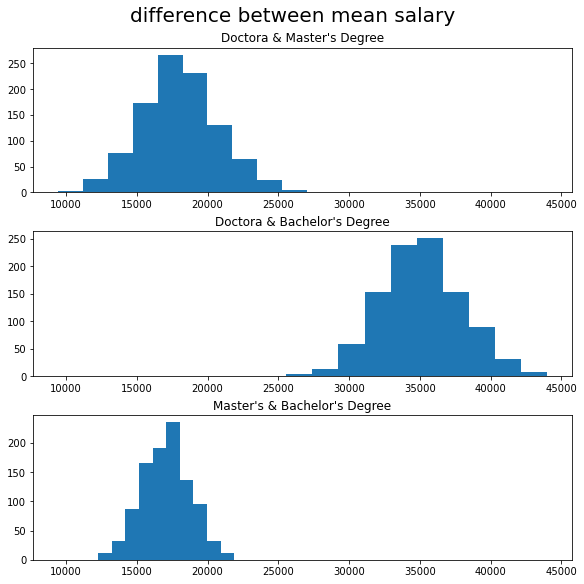

In [20]:
# coompare the differences between each two mean values of the three education levels
fig = plt.figure(constrained_layout=True,figsize=(8,8))
fig.suptitle('difference between mean salary', size=20)   #set the title of the three subplots
gs = fig.add_gridspec(3, hspace=0)    # Specifies 3 grid that a subplot will be placed

ax1 = fig.add_subplot(gs[0, :])
ax1.hist(diff_doc_master)  #get the first plot with the difference between the mean salary between Doctora & Master's Degree
ax1.set_title("Doctora & Master's Degree") 

ax2 = fig.add_subplot(gs[1, :],sharex=ax1)   #get the second distribution of the difference with the same x-axis
ax2.hist(diff_doc_bach)
ax2.set_title("Doctora & Bachelor's Degree")

ax3 = fig.add_subplot(gs[2, :],sharex=ax1)   #get the third distribution with the same x-axis
ax3.hist(diff_master_bach)
ax3.set_title("Master's & Bachelor's Degree")


All the distributions were roughly normal. The mean salary would be mainly $15,000  to  $20,000 higher for the group with Doctoral degree rather than Master’s degree, the difference even enlarged within $32,000 to $38,000 usually if compared with Bachelor’s degree. Besides, the mean salary would increased by $15,000 to $18,000 in most cases if  the bachelor’s degree was upgraded to a Master’s degree. 

# Q3.d 

Perform ANOVA of bootstrapped data.

In [21]:
F2,p2 = f_oneway(bs_bach,bs_master, bs_doc)
print ("ANOVA: F = %g  p = %g" % (F2,p2))

ANOVA: F = 101047  p = 0


as p=0<threshold, the differences on mean salaries were statistically significant.

# Q3.e


All the comments were made below each step, the final one is: mean value of the average pay would rise if the academic degree obtained was higher, if the employee had Bachelor’s degree, Master’s degree, or Doctoral degree.